# Computer Vision 2021 Assignment 2: Image matching and retrieval

In this prac, you will experiment with image feature detectors, descriptors and matching. There are 3 main parts to the prac:

- matching an object in a pair of images
- searching for an object in a collection of images
- analysis and discussion of results

## General instructions

As before, you will use this notebook to run your code and display your results and analysis. Again we will mark a PDF conversion of your notebook, referring to your code if necessary, so you should ensure your code output is formatted neatly. 

***When converting to PDF, include the outputs and analysis only, not your code.*** You can do this from the command line using the `nbconvert` command (installed as part of Jupyter) as follows:

    jupyter nbconvert Assignment2.ipynb --to pdf --no-input --TagRemovePreprocessor.remove_cell_tags 'remove-cell'

This will also remove the preamble text from each question. We will use the `scikit-image` library again to complete the prac. It has several built in functions that will be useful. You are expected to consult documentation and use them appropriately. If you are experienced and want to use functions from other libraries (e.g. OpenCV) that is OK too, but the prac is designed to work with skimage functions so I recommend starting with those.

This being the second assignment, we have provided less strict direction this time and you have more flexibility to choose how you answer each question. However you still need to ensure the outputs and report are clear and easy to read. This includes:

- sizing, arranging and captioning image outputs appropriately
- explaining what you have done clearly and concisely
- clearly separating answers to each question

## Data

We have provided some example images for this assignment, available through a link on the MyUni assignment page. The images are organised by subject matter, with one folder containing images of book covers, one of museum exhibits, and another of urban landmarks. Within each category, there is a “Reference” folder containing a clean image of each object and a “Query” folder containing images taken on a mobile device. Within each category, images with the same name contain the same object (so 001.jpg in the Reference folder contains the same book as 001.jpg in the Query folder).
The data is a subset of the Stanford Mobile Visual Search Dataset which is available at 

<http://web.cs.wpi.edu/~claypool/mmsys-dataset/2011/stanford/index.html>. 

The full data set contains more image categories and more query images of the objects we have provided, which may be useful for your testing!

Do not submit your own copy of the data or rename any files or folders! For marking, we will assume the datasets are available in subfolders of the working directory using the same folder names provided.

Here is some general setup code, which you can edit to suit your needs.

In [207]:
# Numpy is the main package for scientific computing with Python. 
import numpy as np

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots, can be changed
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def draw_outline(ref, query, model):
    """
        Draw outline of reference image in the query image.
        This is just an example to show the steps involved.
        You can modify to suit your needs.
        Inputs:
            ref: reference image
            query: query image
            model: estimated transformation from query to reference image
    """
    r, c = ref.shape[:2]

    # Note that transformations take coordinates in
    # (x, y) format, not (row, column), 
    corners = np.array([[0, 0],
                        [r, 0],
                        [r, c],
                        [0, c],
                        [0, 0]])

    # Warp the image corners to their new positions.
    wc = model(corners)

    # Display the image outline superimposed on the query image
    fig, ax = plt.subplots()
    ax.imshow(query)
    ax.plot(wc[:, 1], wc[:, 0],  'r-', linewidth=2.0)
    ax.set_xlabel('Query')

# Question 1: Matching an object in a pair of images (60%)


In this question, the aim is to accurately locate a reference object in a query image, for example:

![Books](book.png "Books")

0. Download and read through the paper [ORB: an efficient alternative to SIFT or SURF](https://www.researchgate.net/publication/221111151_ORB_an_efficient_alternative_to_SIFT_or_SURF) by Rublee et al. You don't need to understand all the details, but try to get an idea of how it works. ORB combines the FAST corner detector (covered in week 3) and the BRIEF descriptor. BRIEF is based on similar ideas to the SIFT descriptor we covered week 3, but with some changes for efficiency.

1. Load the first (reference, query) image pair from the "book_covers" category. Calculate ORB features in each image using `skimage.feature.ORB()` and match the features using `skimage.feature.match_descriptors()`. 

2. Try changing the parameters for the ORB feature and descriptor matching to improve the matching result. You can use `skimage.feature.plot_matches()` to see the matches visually, in addition to checking the output of `match_descriptors`. At this point, you are not expected to measure matching accuracy numerically. Instead, it is enough to point out errors or differences in performance that you notice by changing settings.
    1. Hint 1: read the documentation for `ORB()` and `match_descriptors()` carefully to understand what the parameters do. More detail on the ORB feature is also available in the [original paper](https://www.researchgate.net/publication/221111151_ORB_an_efficient_alternative_to_SIFT_or_SURF).
    2. Hint 2: Display your results so that the changes you discuss are clearly visible.
    3. Hint 3: Does `match_descriptors(ref, query)` give the same result as `match_descriptors(query, ref)`?


In [24]:
# Your code for descriptor matching tests 
from skimage.io import *
from PIL import Image
from skimage.color import *
from skimage.feature import *
# from skimage.color import rgb2gray

#read in and convert to grayscale image
ref = rgb2gray(imread("A2_smvs/book_covers/Reference/009.jpg"))
que = rgb2gray(imread("A2_smvs/book_covers/Query/009.jpg")) 

#the size of que is 600x800 which is larger than ref, therefore I decided to scale up ref
# ref.resize(600,800)
# size_ref_row,size_ref_col = ref.shape
# print(size_ref_row,  size_ref_col)

def match_ORB(ref,que,keys):
    ref_ORB = ORB(n_keypoints = keys,fast_threshold=0.08)   #output list of dicts
    que_ORB = ORB(n_keypoints = keys,fast_threshold=0.08)  #fast_threshold should be lower if more corners are desired and vice-versa.
     
    
    #Detect oriented FAST keypoints and extract rBRIEF descriptors.
    #detect_and_extract() is a method built on ORB()
    ref_ORB.detect_and_extract(ref) 
    que_ORB.detect_and_extract(que)
    
    matches = match_descriptors(ref_ORB.descriptors,que_ORB.descriptors,cross_check = True,max_ratio=1.00)
   
    #show the image 
    fig,ax = plt.subplots()
    plot_matches(ax,ref,que,ref_ORB.keypoints,que_ORB.keypoints,matches)
#     ax.axis('off')
#     ax.set_title("Ref Image vs. Que Image")
    
    return ref_ORB.keypoints[matches[:,0]],que_ORB.keypoints[matches[:,1]] #this return the matching points 


(array([[178.       , 433.       ],
        [212.4      , 328.8      ],
        [251.       , 458.       ],
        [194.4      , 307.2      ],
        [294.       , 346.       ],
        [197.       , 463.       ],
        [512.3948544, 186.3254016],
        [251.       , 440.       ],
        [237.6      , 387.36     ],
        [216.       , 461.       ],
        [326.88     , 476.64     ],
        [198.72     , 311.04     ],
        [297.       , 475.       ],
        [135.6      , 310.8      ],
        [293.       , 363.       ],
        [ 93.       , 436.       ],
        [154.       , 489.       ],
        [236.736    , 387.072    ],
        [198.72     , 311.04     ],
        [114.       , 427.       ],
        [140.       , 457.       ]]), array([[223. , 153. ],
        [200. , 268. ],
        [195. , 260. ],
        [218. , 156. ],
        [192. , 235. ],
        [211. , 206. ],
        [173. , 255. ],
        [318. , 260. ],
        [217. , 194. ],
        [299. , 184. ],
   

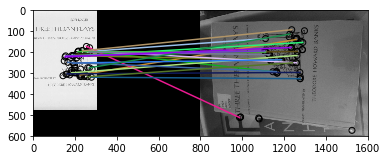

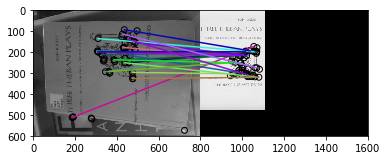

In [25]:
match_ORB(ref,que,50)
match_ORB(que,ref,50)

***Your explanation of what you have done, and your results, here***

match_descriptors(ref, query) does NOT give the same result as match_descriptors(query, ref), this is probably due to the image size. By increasing the number of keypoints, it shows more connections between two images. 

3. Estimate an affine transformation based on the matches, using `skimage.transform.estimate()`. Display the transformed outline of the first reference book cover image on the query image, to see how well they match. Repeat for a 2D projective transformation. Explain your results. 

    - We provide a function `draw_outline()` to help with the display, but you may need to edit it for your needs.
    - Again, you don't need to compare results numerically at this stage. Comment on what you observe visually.

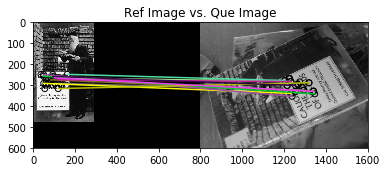

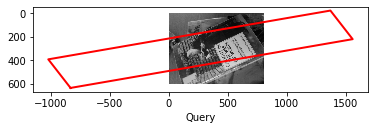

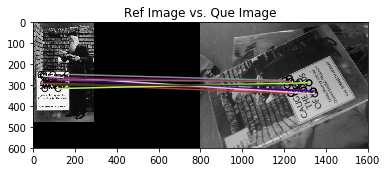

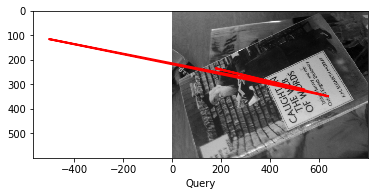

In [5]:
# Your code to display book location here
# skimage.transform.estimate_transform(ttype, src, dst, **kwargs)
from skimage.transform import *
# from cv2 import resize
ref = rgb2gray(imread("A2_smvs/book_covers/Reference/010.jpg"))
que = rgb2gray(imread("A2_smvs/book_covers/Query/010.jpg")) 


rsc,dst = match_ORB(ref,que,30)
model = AffineTransform()
model.estimate(rsc, dst)


#def draw_outline(ref, query, model):
draw_outline(ref,que,model)



ref2 = rgb2gray(imread("A2_smvs/book_covers/Reference/010.jpg"))
que2 = rgb2gray(imread("A2_smvs/book_covers/Query/010.jpg")) 

rsc2,dst2 = match_ORB(ref2,que2,25)

model2 = ProjectiveTransform()
model2.estimate(rsc2,dst2)

#def draw_outline(ref, query, model):
draw_outline(ref2,que2,model2)




***Your explanation of results here***
As the keypoints increase in the function, the match is more accurate. From the above analysis, it is actually not that accurate, but we can see the shape of the rectangle is actually similar to the book itself. The problem here seems to be related to some matching points are incorrect, I did try to manipulate the "fast_threshold" in ORB() and "max_ratio" in the match_desciptors(), but it makes little difference on most of the images.

4. Use RANSAC to estimate an affine transformation and eliminate outlier matches using `skimage.measure.ransac()`. Repeat for a projective transformation. Experiment with different settings and display the effect on the estimated location of the object.


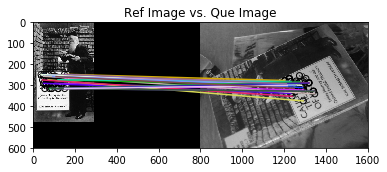

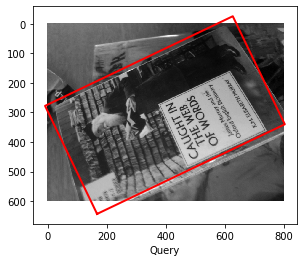

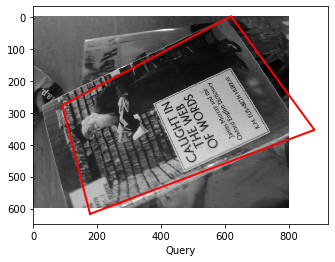

In [6]:
# Your code to display book location after RANSAC here
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
from skimage.transform import AffineTransform

rsc,dst = match_ORB(ref,que,50)

#ransac() will return a model class and an inlier. 
model,inlier = ransac((rsc,dst),AffineTransform,min_samples=5,residual_threshold=0.9)
draw_outline(ref,que,model)


model2,inlier2 = ransac((rsc,dst),ProjectiveTransform,min_samples=5,residual_threshold=0.9)
draw_outline(ref,que,model2)

***Your explanation of what you have tried, and results here***

5. Assume that the inliers found by RANSAC are true matches, and the rest are false matches. How many true positive and false positive matches were found by `match_descriptors()` in part 2? Answer for at least two different cases you tried in part 2. 


In [23]:
# Your code to output TP, FP counts here
count1 = 0 
count2 = 0 
word1_count = 0 
word2_count = 0 
for word in inlier:
    word1_count +=1
    if word == True:
        count1 += 1
for word in inlier2:
    word2_count+=1
    if word == True:
        count2+=1
        
print("inlier1: has " + str(count1) + " TP and " + str(word1_count-count1) +  "FP \n " + str(inlier) + "\n")


print("inlier2: has " + str(count2) + " TP and " + str(word2_count-count2) +  "FP \n " + str(inlier) + "\n")

inlier1: has 6 TP and 15FP 
 [ True False False False False False  True  True  True  True False False
 False False False  True False False False False False]

inlier2: has 8 TP and 13FP 
 [ True False False False False False  True  True  True  True False False
 False False False  True False False False False False]



***Your explanation of how you calculated TP and FP matches here***
From part 2, we can see that match_descriptors90 does find quite a lot of TP, but when it comes to the edges, the accuracy decreases drastically, when we switches the req image and que, we can see that the accuracy decreases as well. From the other examples where we use ransac(), AffineTransform has less TP than using ProjectiveTransform method.

6. Finally, try matching several different image pairs from the data provided, including at least one success and one failure case. For the failure case, test and explain what step in the feature matching has failed, and try to improve it. Display and discuss your findings.
    1. Hint 1: In general, the book covers should be the easiest to match, while the landmarks are the hardest.
    2. Hint 2: Explain why you chose each example shown, and what parameter settings were used.
    3. Hint 3: Possible failure points include the feature detector, the feature descriptor, the matching strategy, or a combination of these.
    4. Hint 4: If the feature detector or descriptor is causing failures, the `skimage.feature` module contains several other detectors (e.g. Harris corners) and descriptors for you to try.  
    5. Hint 5: After loading, resize the query image so that it is approximately the same size as the reference image (within a factor of 2, say). Although the features we use are somewhat scale invariant this should improve your results. You are free to apply any other pre-processing steps you find useful, but tell us what you have done and why!

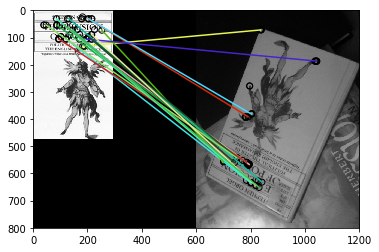

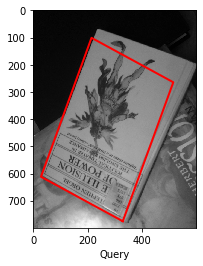

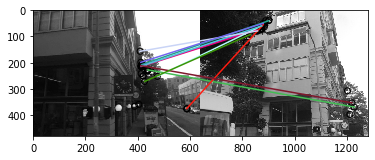

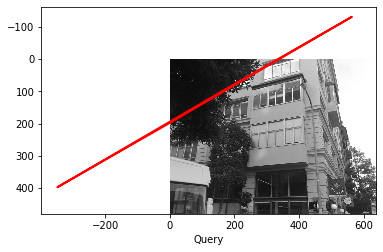

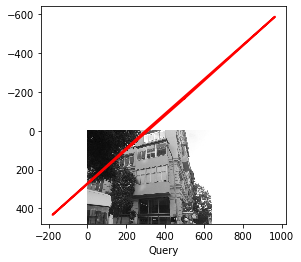

In [168]:
# Your results for other image pairs here

#success case 
ref = rgb2gray(imread("A2_smvs/book_covers/Reference/019.jpg"))
que = rgb2gray(imread("A2_smvs/book_covers/Query/019.jpg")) 

rsc,dst = match_ORB(ref,que,50)
model,inlier = ransac((rsc,dst),AffineTransform,min_samples=5,residual_threshold=0.9)
draw_outline(ref,que,model)

#fail case
ref2 = rgb2gray(imread("A2_smvs/landmarks/Reference/096.jpg"))
que2 = rgb2gray(imread("A2_smvs/landmarks/Query/096.jpg")) 

rsc,dst = match_ORB(ref2,que2,30)
model3,inlier = ransac((rsc,dst),AffineTransform,min_samples=5,residual_threshold=0.9)
draw_outline(ref2,que2,model3)

#trying to improve
model2,inlier = ransac((rsc,dst),AffineTransform,min_samples=7,residual_threshold=0.8)
draw_outline(ref2,que2,model2)




***Your explanation of results here***
The fail case is probably due to the transformation of the camera, the matching points are mostly lie on the tree,but they are not on the same tree. That's why it does not give a correct response, even when I try to manipulate min_samples and esidual_threshold paramters inside the ransac function, it makes little difference. Therefore, if we try to find the matching points, we should not include any object that has similar patterns(trees, windows...). 

# Question 2: What am I looking at? (40%)


<!--One application of feature matching is image retrieval. The goal of image retrieval is, given a query image of an object, to find all images in a database containing the same object, and return the results in ranked order (like a Google search). This is a huge research area but we will implement a very basic version of the problem based on the small dataset provided.-->

In this question, the aim is to identify an "unknown" object depicted in a query image, by matching it to multiple reference images, and selecting the highest scoring match. Since we only have one reference image per object, there is at most one correct answer. This is useful for example if you want to automatically identify a book from a picture of its cover, or a painting or a geographic location from an unlabelled photograph of it.

The steps are as follows:

1. Select a set of reference images and their corresponding query images. 

    1. Hint 1: Start with the book covers, or just a subset of them.
    2. Hint 2: `skimage.io.ImageCollection()` may be useful here.
    3. This question can require a lot of computation to run from start to finish, so cache intermediate results (e.g. feature descriptors) where you can.
    
2. Choose one query image corresponding to one of your reference images. Use RANSAC to match your query image to each reference image, and count the number of inlier matches found in each case. This will be the matching score for that image.

3. Identify the query object. This is the identity of the reference image with the highest match score, or "not in dataset" if the maximum score is below a threshold.

4. Repeat steps 2-3 for every query image and report the overall accuracy of your method (that is, the percentage of query images that were correctly matched in the dataset). Discussion of results should include both overall accuracy and individual failure cases.

    1. Hint 1: In case of failure, what ranking did the actual match receive? If we used a "top-k" accuracy measure, where a match is considered correct if it appears in the top k match scores, would that change the result?

<!--Code to implement this algorithm should mostly be written in a supporting file such as a2code.py. Call your code and display outputs in the notebook below.--> 


In [220]:
# Your code to iddntify query objects and measure search accuracy for data set here 
#load 001.jpg from books_covers/reference, this is the image that we want to find the highest match to it 
from skimage.io import ImageCollection


def match_ORB2(ref,que,keys):
    ref_ORB = ORB(n_keypoints = keys,fast_threshold=0.08)   #output list of dicts
    que_ORB = ORB(n_keypoints = keys,fast_threshold=0.08)  #fast_threshold should be lower if more corners are desired and vice-versa.  
    ref_ORB.detect_and_extract(ref) 
    que_ORB.detect_and_extract(que)
    
    matches = match_descriptors(ref_ORB.descriptors,que_ORB.descriptors,cross_check = True,max_ratio=1.00)
    return ref_ORB.keypoints[matches[:,0]],que_ORB.keypoints[matches[:,1]] #this return the matching points 


ref = rgb2gray(imread("A2_smvs/book_covers/Reference/001.jpg"))
# ic = ImageCollection("A2_smvs/book_covers//001.jpg")
que1 = rgb2gray(imread("A2_smvs/book_covers/Reference/012.jpg"))
que2 = rgb2gray(imread("A2_smvs/book_covers/Reference/100.jpg"))
que3 = rgb2gray(imread("A2_smvs/book_covers/Reference/001.jpg"))
que4 = rgb2gray(imread("A2_smvs/book_covers/Reference/047.jpg"))
que5 = rgb2gray(imread("A2_smvs/book_covers/Reference/024.jpg"))

#arrange the que's into a list 
que_list = [que1,que2,que3,que4,que5]  

def find_match(ref,que_list):
    count = 0 
    TP = 0
    index = -100
    
    for que in que_list:
        rsc,dst = match_ORB2(ref,que,50)
        model,inlier = ransac((rsc,dst),AffineTransform,min_samples=5,residual_threshold=0.9)
        count += 1 
        print("The percentage of TP that " + str(count) + " inlier got is: " + str(np.mean(inlier*100)) + "%")
        if np.mean(inlier*100) > TP:
            TP = np.mean(inlier*100)
            index = count

    print("\n\n\n" + "The highest score match is the " + str(index) + "th query image, with a score of " + str(TP) + "%")
    return index, TP
    
find_match(ref,que_list)

The percentage of TP that 1 inlier got is: 15.789473684210526%
The percentage of TP that 2 inlier got is: 13.636363636363637%
The percentage of TP that 3 inlier got is: 100.0%
The percentage of TP that 4 inlier got is: 18.75%
The percentage of TP that 5 inlier got is: 15.789473684210526%



The highest score match is the 3th query image, with a score of 100.0%


***Your explanation of what you have done, and your results, here***
In the dataset, I had include 1 correct image and the others are incorrect, I printed out whichever achieves the highest score and its index in the list. 

5. Choose some extra query images of objects that do not occur in the reference dataset. Repeat step 4 with these images added to your query set. Accuracy is now measured by the percentage of query images correctly identified in the dataset, or correctly identified as not occurring in the dataset. Report how accuracy is altered by including these queries, and any changes you have made to improve performance.

In [222]:
# Your code to run extra queries and display results here
threshold = 30

def find_match2(ref,que_list,threshold):
    count = 0 
    TP = 0
    index = -100
    
    for que in que_list:
        rsc,dst = match_ORB2(ref,que,50)
        model,inlier = ransac((rsc,dst),AffineTransform,min_samples=5,residual_threshold=0.9)
        count += 1 
        
        if np.mean(inlier*100) > TP:
            TP = np.mean(inlier*100)
            index = count
            
    if(TP<=threshold):
        print("No matching query image found in this dataset")
    else:
        print("\n\n\n" + "The highest score match is the " + str(index) + "th query image, with a score of " + str(TP) + "%")
    

que1 = rgb2gray(imread("A2_smvs/book_covers/Reference/042.jpg"))
que2 = rgb2gray(imread("A2_smvs/book_covers/Reference/010.jpg"))
que3 = rgb2gray(imread("A2_smvs/book_covers/Reference/021.jpg"))
que4 = rgb2gray(imread("A2_smvs/book_covers/Reference/040.jpg"))
que5 = rgb2gray(imread("A2_smvs/book_covers/Reference/019.jpg"))
que6 = rgb2gray(imread("A2_smvs/book_covers/Reference/099.jpg"))
que7 = rgb2gray(imread("A2_smvs/book_covers/Reference/083.jpg"))
que8 = rgb2gray(imread("A2_smvs/book_covers/Reference/039.jpg"))
que9 = rgb2gray(imread("A2_smvs/book_covers/Reference/048.jpg"))
que10 = rgb2gray(imread("A2_smvs/book_covers/Reference/003.jpg"))

#arrange the que's into a list 
que_list = [que1,que2,que3,que4,que5,que6,que7,que8,que9,que10]  

find_match2(ref,que_list,threshold)


No matching query image found in this dataset


***Your explanation of results and any changes made here***
The dataset is consisted of 10 images that is not the reference images. The threshold is set to be 30% as observed from the question 5, therefore after the iteration, if no image has a TP rate of more than 30%, it will output "No matching query image found in this dataset" ,otherwise it will output the image that it seems to be the correct match. 


6. Repeat step 4 and 5 for at least one other set of reference images from museum_paintings or landmarks, and compare the accuracy obtained. Analyse both your overall result and individual image matches to diagnose where problems are occurring, and what you could do to improve performance. Test at least one of your proposed improvements and report its effect on accuracy.


In [243]:
# Your code to search images and display results here
ref = rgb2gray(imread("A2_smvs/landmarks/Reference/009.jpg"))
que1 = rgb2gray(imread("A2_smvs/landmarks/Query/041.jpg"))
que2 = rgb2gray(imread("A2_smvs/landmarks/Query/010.jpg"))
que3 = rgb2gray(imread("A2_smvs/landmarks/Query/020.jpg"))
que4 = rgb2gray(imread("A2_smvs/landmarks/Query/042.jpg"))
que5 = rgb2gray(imread("A2_smvs/landmarks/Query/016.jpg"))
que6 = rgb2gray(imread("A2_smvs/landmarks/Query/090.jpg"))
que7 = rgb2gray(imread("A2_smvs/landmarks/Query/083.jpg"))
que8 = rgb2gray(imread("A2_smvs/landmarks/Query/033.jpg"))
que9 = rgb2gray(imread("A2_smvs/landmarks/Query/042.jpg"))
que10 = rgb2gray(imread("A2_smvs/landmarks/Query/009.jpg"))


def find_match3(ref,que_list,min_samples):
    count = 0 
    TP = 0
    index = -100
    
    for que in que_list:
        rsc,dst = match_ORB2(ref,que,50)
        model,inlier = ransac((rsc,dst),AffineTransform,min_samples,residual_threshold=0.9)
        count += 1 
        print("The percentage of TP that " + str(count) + " inlier got is: " + str(np.mean(inlier*100)) + "%")
        if np.mean(inlier*100) > TP:
            TP = np.mean(inlier*100)
            index = count

    print("\n" + "The highest score match is the " + str(index) + "th query image, with a score of " + str(TP) + "%\n")

#arrange the que's into a list 
que_list = [que1,que2,que3,que4,que5,que6,que7,que8,que9,que10]  

#This gives wrong result 
find_match3(ref,que_list,5)

#Trying to increase the min_samples 
find_match3(ref,que_list,10)



The percentage of TP that 1 inlier got is: 21.428571428571427%
The percentage of TP that 2 inlier got is: 15.0%
The percentage of TP that 3 inlier got is: 20.0%
The percentage of TP that 4 inlier got is: 15.0%
The percentage of TP that 5 inlier got is: 16.666666666666668%
The percentage of TP that 6 inlier got is: 15.789473684210526%
The percentage of TP that 7 inlier got is: 21.428571428571427%
The percentage of TP that 8 inlier got is: 16.666666666666668%
The percentage of TP that 9 inlier got is: 15.0%
The percentage of TP that 10 inlier got is: 25.0%

The highest score match is the 10th query image, with a score of 25.0%

The percentage of TP that 1 inlier got is: 0.0%
The percentage of TP that 2 inlier got is: 0.0%
The percentage of TP that 3 inlier got is: 0.0%
The percentage of TP that 4 inlier got is: 0.0%
The percentage of TP that 5 inlier got is: 0.0%
The percentage of TP that 6 inlier got is: 0.0%
The percentage of TP that 7 inlier got is: 0.0%
The percentage of TP that 8 in

***Your description of what you have done, and explanation of results, here***
By using a min_samples of 5, even though it gives the correct result, but we can notice that some other scores from query images are also close to the actual score. Therefore, I decided to increase the min_samples to 10, it now shows 0 score for other wrong query images, but also reduce the TP score in the correct image. 

# Question 3 (Postgraduate only, 10%)


SyntaxError: invalid syntax (<ipython-input-244-472068ae9c2d>, line 1)

In Question 1, you counted true positive and false positive matches, assuming that RANSAC inliers were true matches. How would you determine *false negative* matches (a matching pair of features exists but was not found)? How about *true negative* matches (no match exists in the reference image, and none was found)? Note you do not need to implement your method, just describe the steps you would take.

***Your method here***